In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization,MaxPooling2D
from keras.layers import Dense , Flatten,Dropout
from keras import backend as K
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
print("No.of training Samples=",x_train.shape[0])
print("No.of test Samples=",x_test.shape[0])

No.of training Samples= 60000
No.of test Samples= 10000


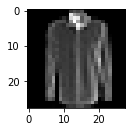

In [4]:
plt.subplot(231)
rand_value=np.random.randint(0,x_train.shape[0])
plt.imshow(x_train[rand_value], cmap=plt.get_cmap('gray'))

In [5]:

img_width=x_train[0].shape[0]
img_length=x_train[1].shape[0]

In [19]:
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

In [7]:
Input_shape=(28,28,1)

In [8]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
print(y_train.shape)

(60000,)


In [9]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)



In [23]:
model= Sequential()
model.add(Conv2D(32,3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add (Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add (Dense(10,activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',
optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)             

In [25]:

model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 9s 18ms/step - loss: 0.4336 - accuracy: 0.8499 - val_loss: 1.0540 - val_accuracy: 0.6193
Epoch 2/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2802 - accuracy: 0.9003 - val_loss: 0.2871 - val_accuracy: 0.8936
Epoch 3/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2377 - accuracy: 0.9147 - val_loss: 0.2465 - val_accuracy: 0.9130
Epoch 4/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2077 - accuracy: 0.9241 - val_loss: 0.2292 - val_accuracy: 0.9181
Epoch 5/100
469/469 [==============================] - 8s 17ms/step - loss: 0.1878 - accuracy: 0.9320 - val_loss: 0.2757 - val_accuracy: 0.8989
Epoch 6/100
469/469 [==============================] - 8s 17ms/step - loss: 0.1702 - accuracy: 0.9371 - val_loss: 0.2188 - val_accuracy: 0.9238
Epoch 7/100
469/469 [==============================] - 8s 17ms/step - loss: 0.1540 - accuracy: 0.9447 - val_loss: 0.2793 - val_accuracy:

In [26]:
score =model.evaluate(x_test,y_test)
print("Test loss=" ,score[0])
print("Test accuracy=" ,score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.3812 - accuracy: 0.9349
Test loss= 0.38122567534446716
Test accuracy= 0.9348999857902527


In [27]:
model.save("fashion.h5")

In [29]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [41]:
def load_image(filename):
    # Load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # Convert the image to array
    img = img_to_array(img)
    # Reshape the image into a sample of 1 channel
    img = img.reshape(1, 28, 28, 1)
    # Prepare it as pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [42]:
img = load_image(r'/pullover.jpg')
# Load the saved model
class_prediction = model.predict(img)

y_pred = np.round(class_prediction).astype(int)
print(class_prediction)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[[1.2811700e-12 2.9727848e-10 6.9488896e-18 5.7458942e-15 2.3238597e-11
  2.9691649e-13 8.0155242e-20 5.4021228e-12 1.0000000e+00 5.7455308e-12]]
